/tmp/ipykernel_10014/1218661819.py:54: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.lineplot(x='E*/MeV', y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[plot_from:plot_from+plot_how_many]))], palette=colors)
/tmp/ipykernel_10014/1218661819.py:55: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.lineplot(x='E*/MeV', y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df10.columns[plot_from:plot_from+plot_how_many]))], linestyle='--', legend=None, palette=colors)


4He253Es257Md_V0-70_sigr-3.0_chn-pxn.pdf


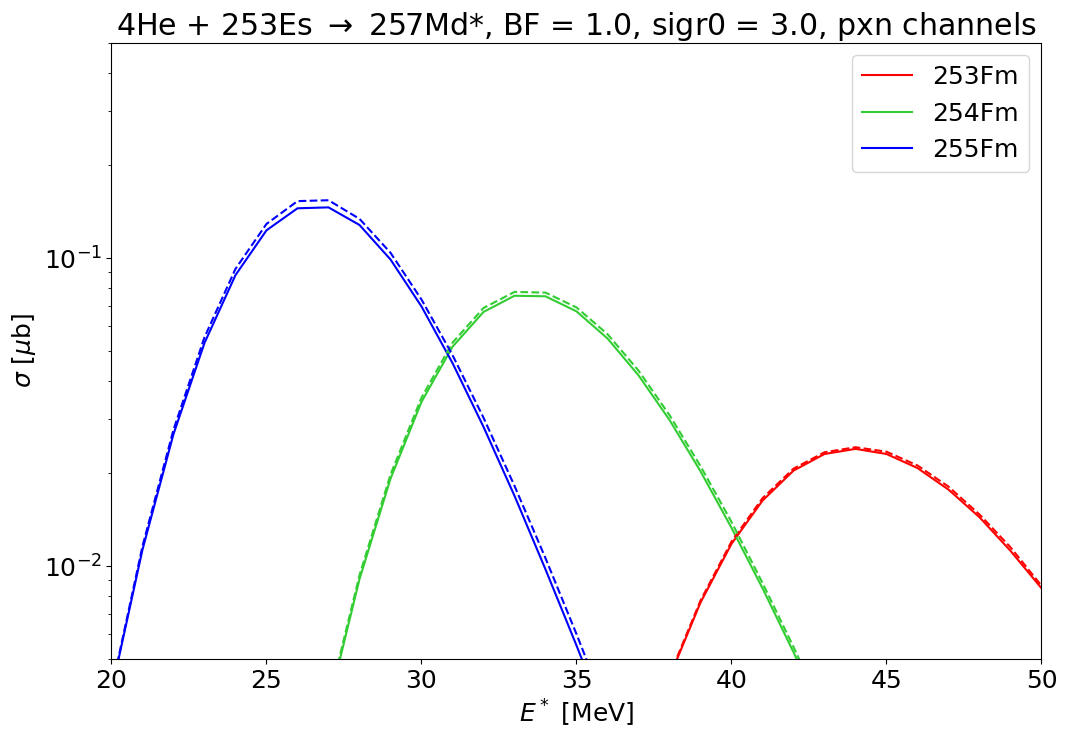

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

proj = '4He'
trg = '253Es'
cn = '257Md'
bf = 1.0
ch = 'pxn'
sigr = 3.0
v0 = 59
# bf_diff = 0.01

df10_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf:.1f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
df0_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf:.1f}' + '_sigr' + str(sigr) + '.dat', sep='\t')

# bf_low_10_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf-bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
# bf_high_10_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf+bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')

# bf_low_0_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf-bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
# bf_high_0_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf+bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
# df10_mb

dfm10_mb = df10_mb.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')
dfm0_mb = df0_mb.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')

#scale the data to either nb, ub or whatever
dfm10 = dfm10_mb
dfm0 = dfm0_mb
df10 = df10_mb
df0 = df0_mb

mb = 1
ub = 1e3
nb = 1e6

scale = ub
dfm10['CS'] = dfm10_mb['CS']*scale
dfm0['CS'] = dfm0_mb['CS']*scale
df10.iloc[:,2:] = df10_mb.iloc[:,2:] * scale
df0.iloc[:,2:] = df0_mb.iloc[:,2:] * scale


plt.rcParams.update({'font.size': 18})

colors = ['red', 'limegreen', 'blue', 'gold', 'black', 'turquoise', 'magenta', 'grey', 'olive', 'brown']
sns.color_palette("dark")

plot_from = 5
plot_how_many = 3

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x='E*/MeV', y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[plot_from:plot_from+plot_how_many]))], palette=colors)
sns.lineplot(x='E*/MeV', y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df10.columns[plot_from:plot_from+plot_how_many]))], linestyle='--', legend=None, palette=colors)

plt.semilogy()
plt.ylim(5e-3, 5e-1)
plt.xlim(20, 50)
plt.title(proj + ' + ' + trg + r' $\rightarrow$ ' + cn + '*, BF = ' + str(bf) + ', sigr0 = ' + str(sigr) + ', ' + ch + ' channels', va='top')
if scale == mb:
    plt.ylabel('$\sigma$ [mb]')
elif scale == ub:
    plt.ylabel('$\sigma$ [$\mu$b]')
elif scale == nb:
    plt.ylabel('$\sigma$ [nb]')
plt.xlabel('$E^*$ [MeV]')
plt.legend(loc='upper right')

plt.savefig(proj + trg + cn + '_V0-' + str(v0) + '_sigr-' + str(sigr) + '_chn-' + ch +'.pdf')
print(proj + trg + cn + '_V0-' + str(v0) + '_sigr-' + str(sigr) + '_chn-' + ch +'.pdf')